## Data Description

The data used in this work is credited to the work carried away by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

This data has to do with a red wine quality of a Portuguese "Vinho Verde" wine and comprises physicochemical properties of the wine. These characteristics were obtained from May/2004 to February/2007 when samples were tested at the official certification entity - CVRVV - whose goal is to improve the quality and marketing of vinho verde.
It is composed by 1599 entries, each row being a diferent wine sample and each collumn being a physicochemical test performed on the sample, having a total of 11 tests performed. There is a 12th collumn, which corresponds to the final rating the wine received. Details on the data and its purposes can be found at [Cortez et al., 2009].

The phisicochemical tests are:
- Fixed acidity (mg/L): Acids are a major component of wine. Fixed acids are the acids that originally produced in the grape or later during the fermentation process by yeast, and therefore nonvolatile. These are tartaric, malic, citric (all produced by the grape) and succinic (by the yeast). Type: double;
- Volatile acidity (mg/L): These are the acids formed as a byproduct of fermentation and are released as steam. It is almost only acetic acid but it can also be lactic, formic, butyric, and propionic acids. Type: double;
- Citric acid (mg/L): An organic weak acid and therefore used to preserve the wine and stop microbial and mold activity. Can also be added to increase the acidity of flavor of the wine. Type: double;
- Residual sugar (g/L): Residual sugars refer to the natural sugars present in grapes (glucose, fructose) that remain in the wine even after fermentation takes place. Type: double;
- Chlorides (g/L): Chlorides are eletrolytes and can therefore help reducing wine acidity. Type: double;
- Free sulfur dioxide (mg/L): Used to calculate the amount of sulfur dioxide used, it is the sulfur dioxide that did not bind with any other molecule. Type: double;
- Total sulfur dioxide (mg/L): Sulfur dioxide is used throughout winemaking stages to prevent oxidation and microbial growth;
- Density (g/mL): Mass per volume of wine, used to estimate the quality of the wine. Type: double;
- pH: Measures the acidity of the wine in the pH scale. All wines lie on the acidic range (2.5-4.5). Type: double;
- Sulphates (g/L): This should be sulfites and not sulphates, as the firsts are not used in wine making. Sulfites occurr naturaly in grapes and act as a preservative by inhibiting microbial growth. Type: double;
- Alcohol (%): Percentage of alcohol per volume, the direct product of fermentation. Type: double;

The last feature, corresponding to the rating, was obtained by using at least three sensory assessors (using blind tastes) which attributed a rating from 0 (very bad) to 10 (excellent). The final rating is the average of the ratings. The type of this feature is therefore, int. 

## Data Analysis

In [1]:
library(e1071)
library(ggplot2)
library(GGally)
require(gridExtra)
library(purrr)
library(tidyr)
library(reshape)
library(FSA)
library(dplyr)
library(repr)
source("stratified.r")
set.seed(123)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: gridExtra


Attaching package: ‘reshape’


The following objects are masked from ‘package:tidyr’:

    expand, smiths


## FSA v0.8.30. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.


Attaching package: ‘dplyr’


The following object is masked from ‘package:reshape’:

    rename


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:GGally’:

    nasa


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
raw_data = read.csv('winequality-red.csv')
#raw_data$quality = factor(raw_data$quality)

In [3]:
head(raw_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


In [4]:
summary(raw_data)

 fixed.acidity   volatile.acidity  citric.acid    residual.sugar  
 Min.   : 4.60   Min.   :0.1200   Min.   :0.000   Min.   : 0.900  
 1st Qu.: 7.10   1st Qu.:0.3900   1st Qu.:0.090   1st Qu.: 1.900  
 Median : 7.90   Median :0.5200   Median :0.260   Median : 2.200  
 Mean   : 8.32   Mean   :0.5278   Mean   :0.271   Mean   : 2.539  
 3rd Qu.: 9.20   3rd Qu.:0.6400   3rd Qu.:0.420   3rd Qu.: 2.600  
 Max.   :15.90   Max.   :1.5800   Max.   :1.000   Max.   :15.500  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.01200   Min.   : 1.00       Min.   :  6.00       Min.   :0.9901  
 1st Qu.:0.07000   1st Qu.: 7.00       1st Qu.: 22.00       1st Qu.:0.9956  
 Median :0.07900   Median :14.00       Median : 38.00       Median :0.9968  
 Mean   :0.08747   Mean   :15.87       Mean   : 46.47       Mean   :0.9967  
 3rd Qu.:0.09000   3rd Qu.:21.00       3rd Qu.: 62.00       3rd Qu.:0.9978  
 Max.   :0.61100   Max.   :72.00       Max.   :289.00       Max.   :1

In [5]:
data = stratified(raw_data, 'quality', 15)
#data2 = data
#data2$quality = as.integer(data2$quality)

Some groups
---3---
contain fewer observations than desired number of samples.
All observations have been returned from those groups.



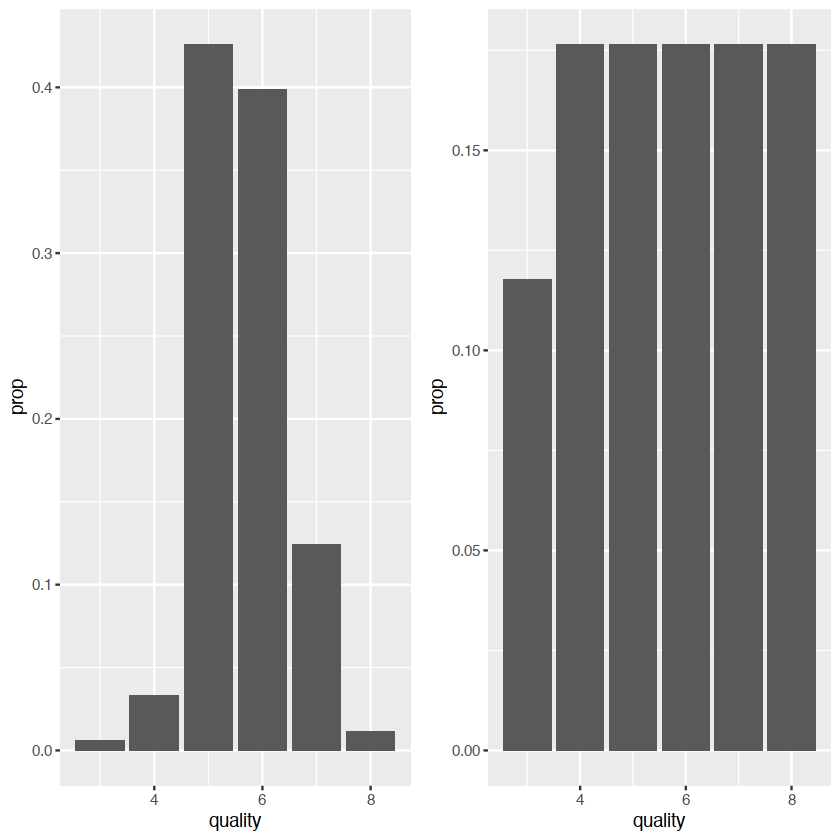

In [6]:
# check proportions are still the same
raw_plot = ggplot(raw_data, aes(x=quality)) + geom_bar(aes(y = ..prop.., group = 1))
strat_plot = ggplot(data, aes(x=quality)) + geom_bar(aes(y = ..prop.., group = 1))
grid.arrange(raw_plot, strat_plot, ncol=2)

In [7]:
summary(data)

 fixed.acidity    volatile.acidity  citric.acid     residual.sugar 
 Min.   : 5.000   Min.   :0.2100   Min.   :0.0000   Min.   :1.200  
 1st Qu.: 7.200   1st Qu.:0.3800   1st Qu.:0.0600   1st Qu.:1.800  
 Median : 8.100   Median :0.5300   Median :0.2600   Median :2.100  
 Mean   : 8.493   Mean   :0.5638   Mean   :0.2767   Mean   :2.488  
 3rd Qu.: 9.900   3rd Qu.:0.6750   3rd Qu.:0.4400   3rd Qu.:2.600  
 Max.   :15.000   Max.   :1.5800   Max.   :1.0000   Max.   :6.700  
   chlorides       free.sulfur.dioxide total.sulfur.dioxide    density      
 Min.   :0.04400   Min.   : 3.00       Min.   :  7.00       Min.   :0.9908  
 1st Qu.:0.06400   1st Qu.: 6.00       1st Qu.: 15.00       1st Qu.:0.9952  
 Median :0.07800   Median : 9.00       Median : 27.00       Median :0.9964  
 Mean   :0.08884   Mean   :13.24       Mean   : 35.76       Mean   :0.9966  
 3rd Qu.:0.09400   3rd Qu.:18.00       3rd Qu.: 48.00       3rd Qu.:0.9981  
 Max.   :0.61000   Max.   :42.00       Max.   :120.00       Ma

Qualities 3, 4 and 8 will be removed for only having 1, 5 and 2 samples, respectively.

In [8]:
head(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
691,7.4,1.185,0.00,4.25,0.097,5,14,0.99660,3.63,0.54,10.70,3
1506,6.7,0.760,0.02,1.80,0.078,6,12,0.99600,3.55,0.63,9.95,3
518,10.4,0.610,0.49,2.10,0.200,5,16,0.99940,3.16,0.63,8.40,3
1470,7.3,0.980,0.05,2.10,0.061,20,49,0.99705,3.31,0.55,9.70,3
1300,7.6,1.580,0.00,2.10,0.137,5,9,0.99476,3.50,0.40,10.90,3
1479,7.1,0.875,0.05,5.70,0.082,3,14,0.99808,3.40,0.52,10.20,3


# Bivariate analysis

In [9]:
library(FactoMineR)

Warning message in ggscatmat(data, color = "quality", alpha = 0.8):
“Factor variables are omitted in plot”


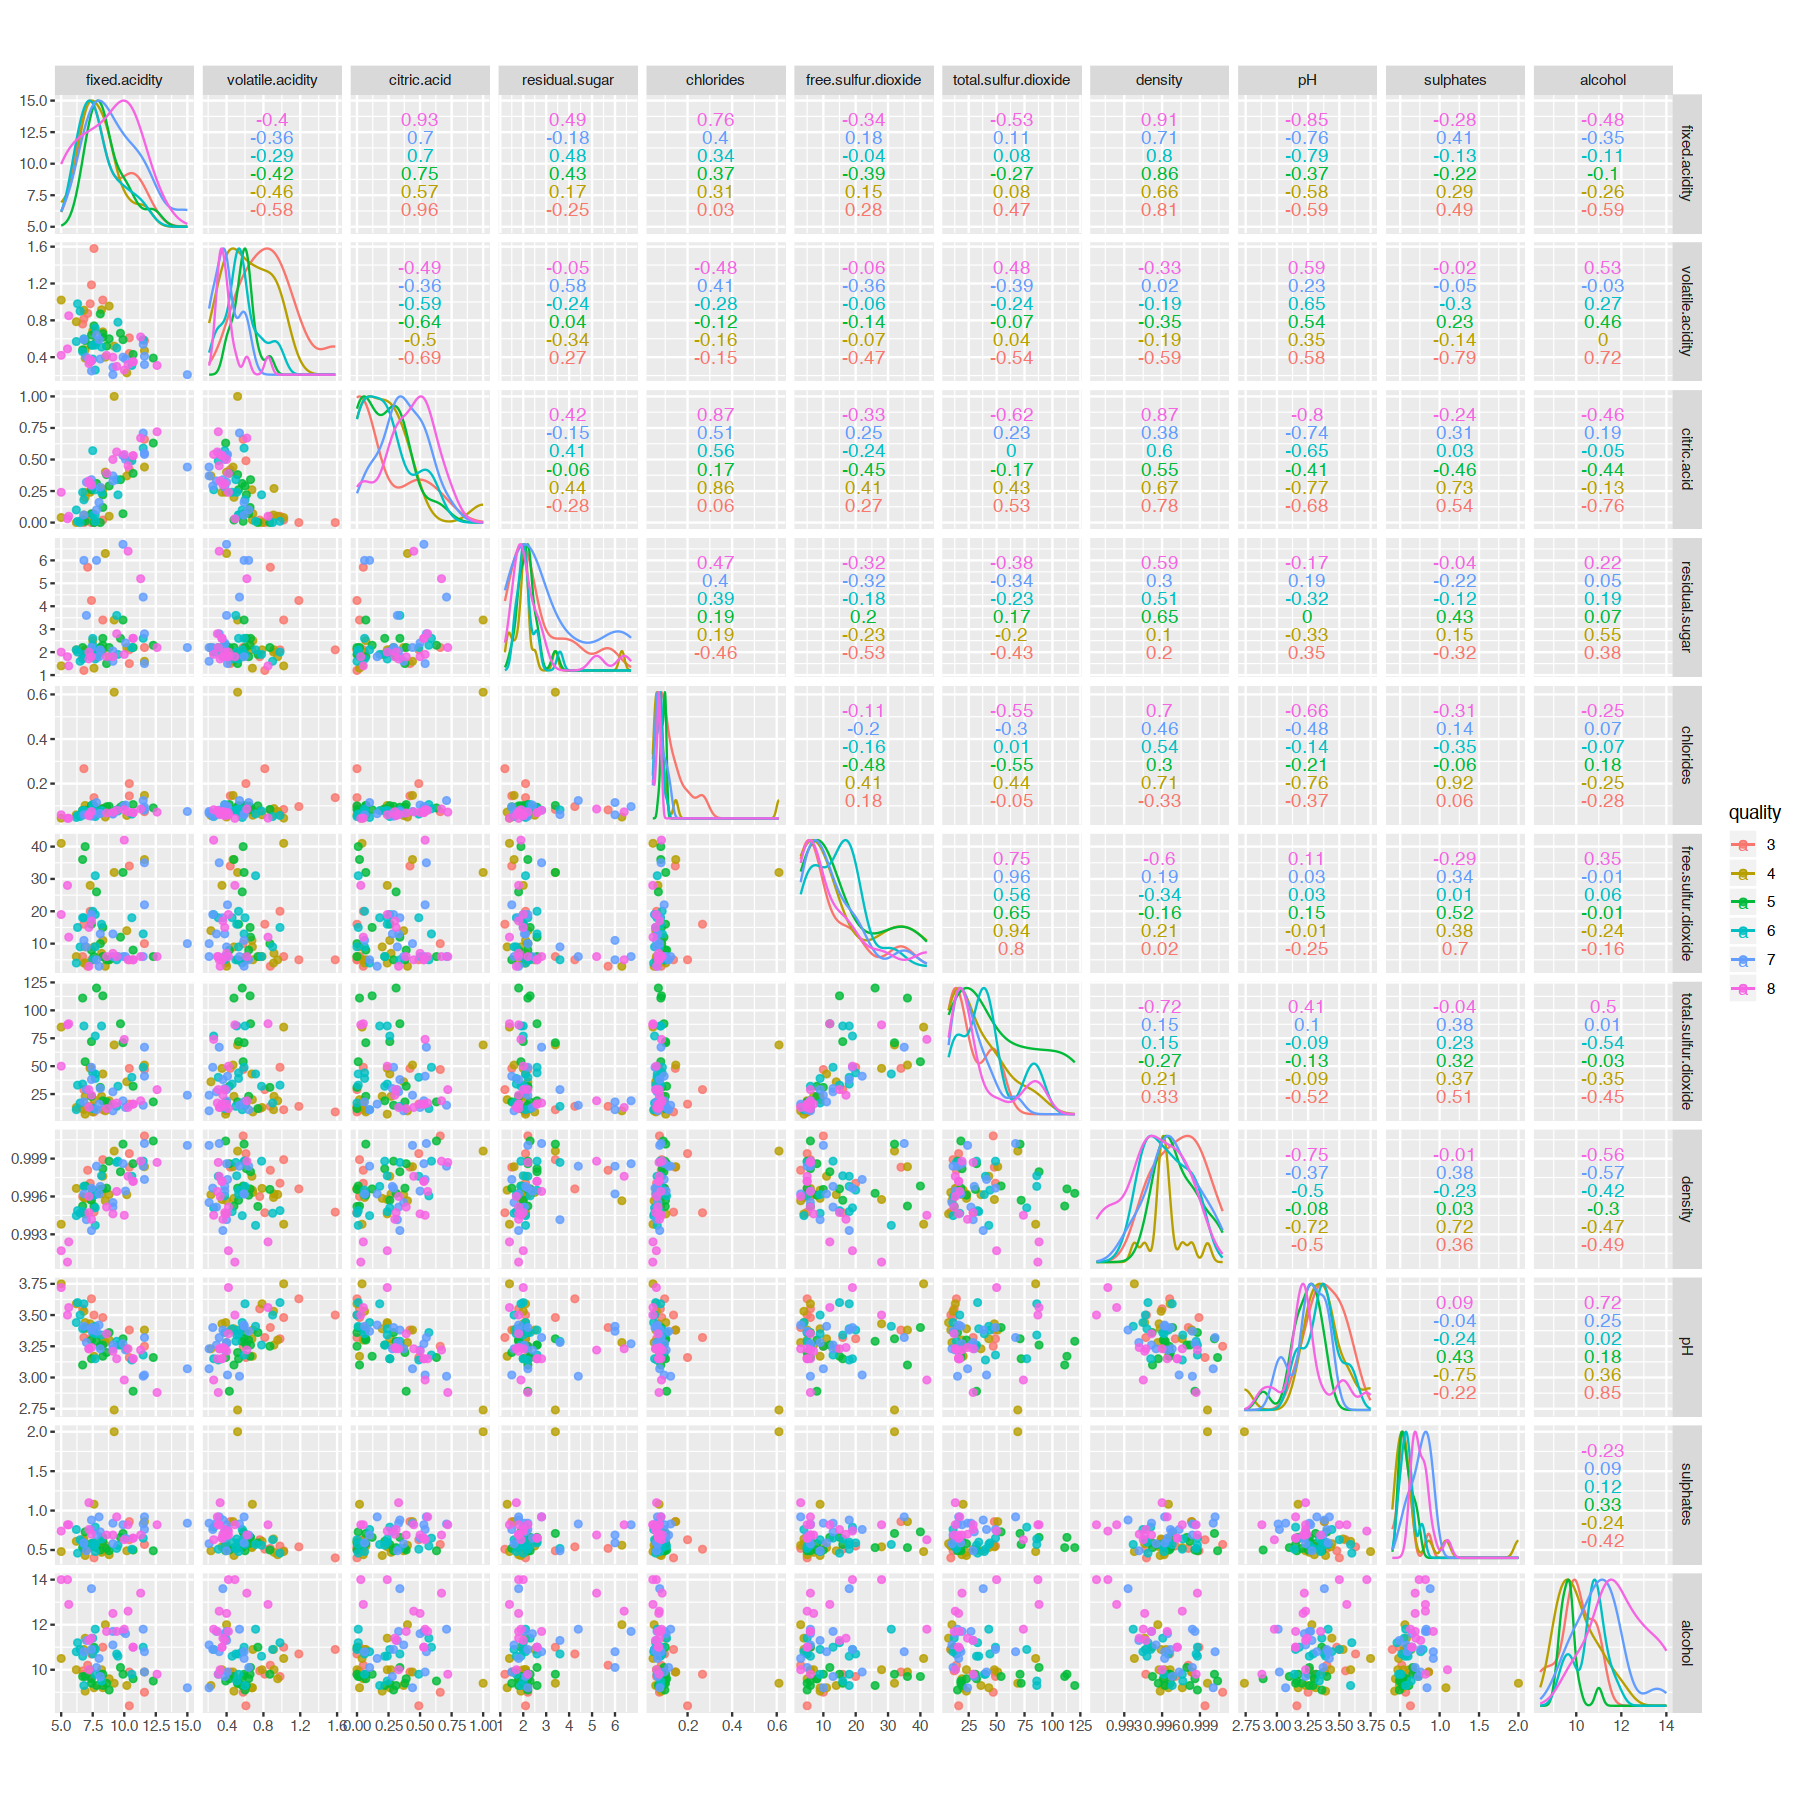

In [10]:
options(repr.plot.width=15, repr.plot.height=15)
ggscatmat(data, color="quality", alpha=0.8)

An overall look at the correlations allows us to understand that variables "fixed.acidity" and "pH" are the variables that display higher correlations with the other variables. These correlations tend to have more expression on the higher (7/8) and the lower (3/4) qualities of wine.
Some of the most notorious correlations are:
- fixed.acidity
    - citric.acid for all qualities but 4
    - clorides for quality 7 and 8
    - density for all qualities but 5
    - pH strong negative correlation for all qualities but 4
- sulfits and volatile.acidity have a strong negative correlation for quality 3 wines
- citric.acid
    - clorides have a strong correlation for qualities 4 and 8
    - density for qualities 3, 4 and 8
- pH
    - citric.acid strong negative correlation for quality 5
    - clorides for qualities 4 and 8
    - alcohol for qualities 3 and 8
- total.sulfur.dioxide and free.sulfur.dioxide also have relatively high correlation for all qualities

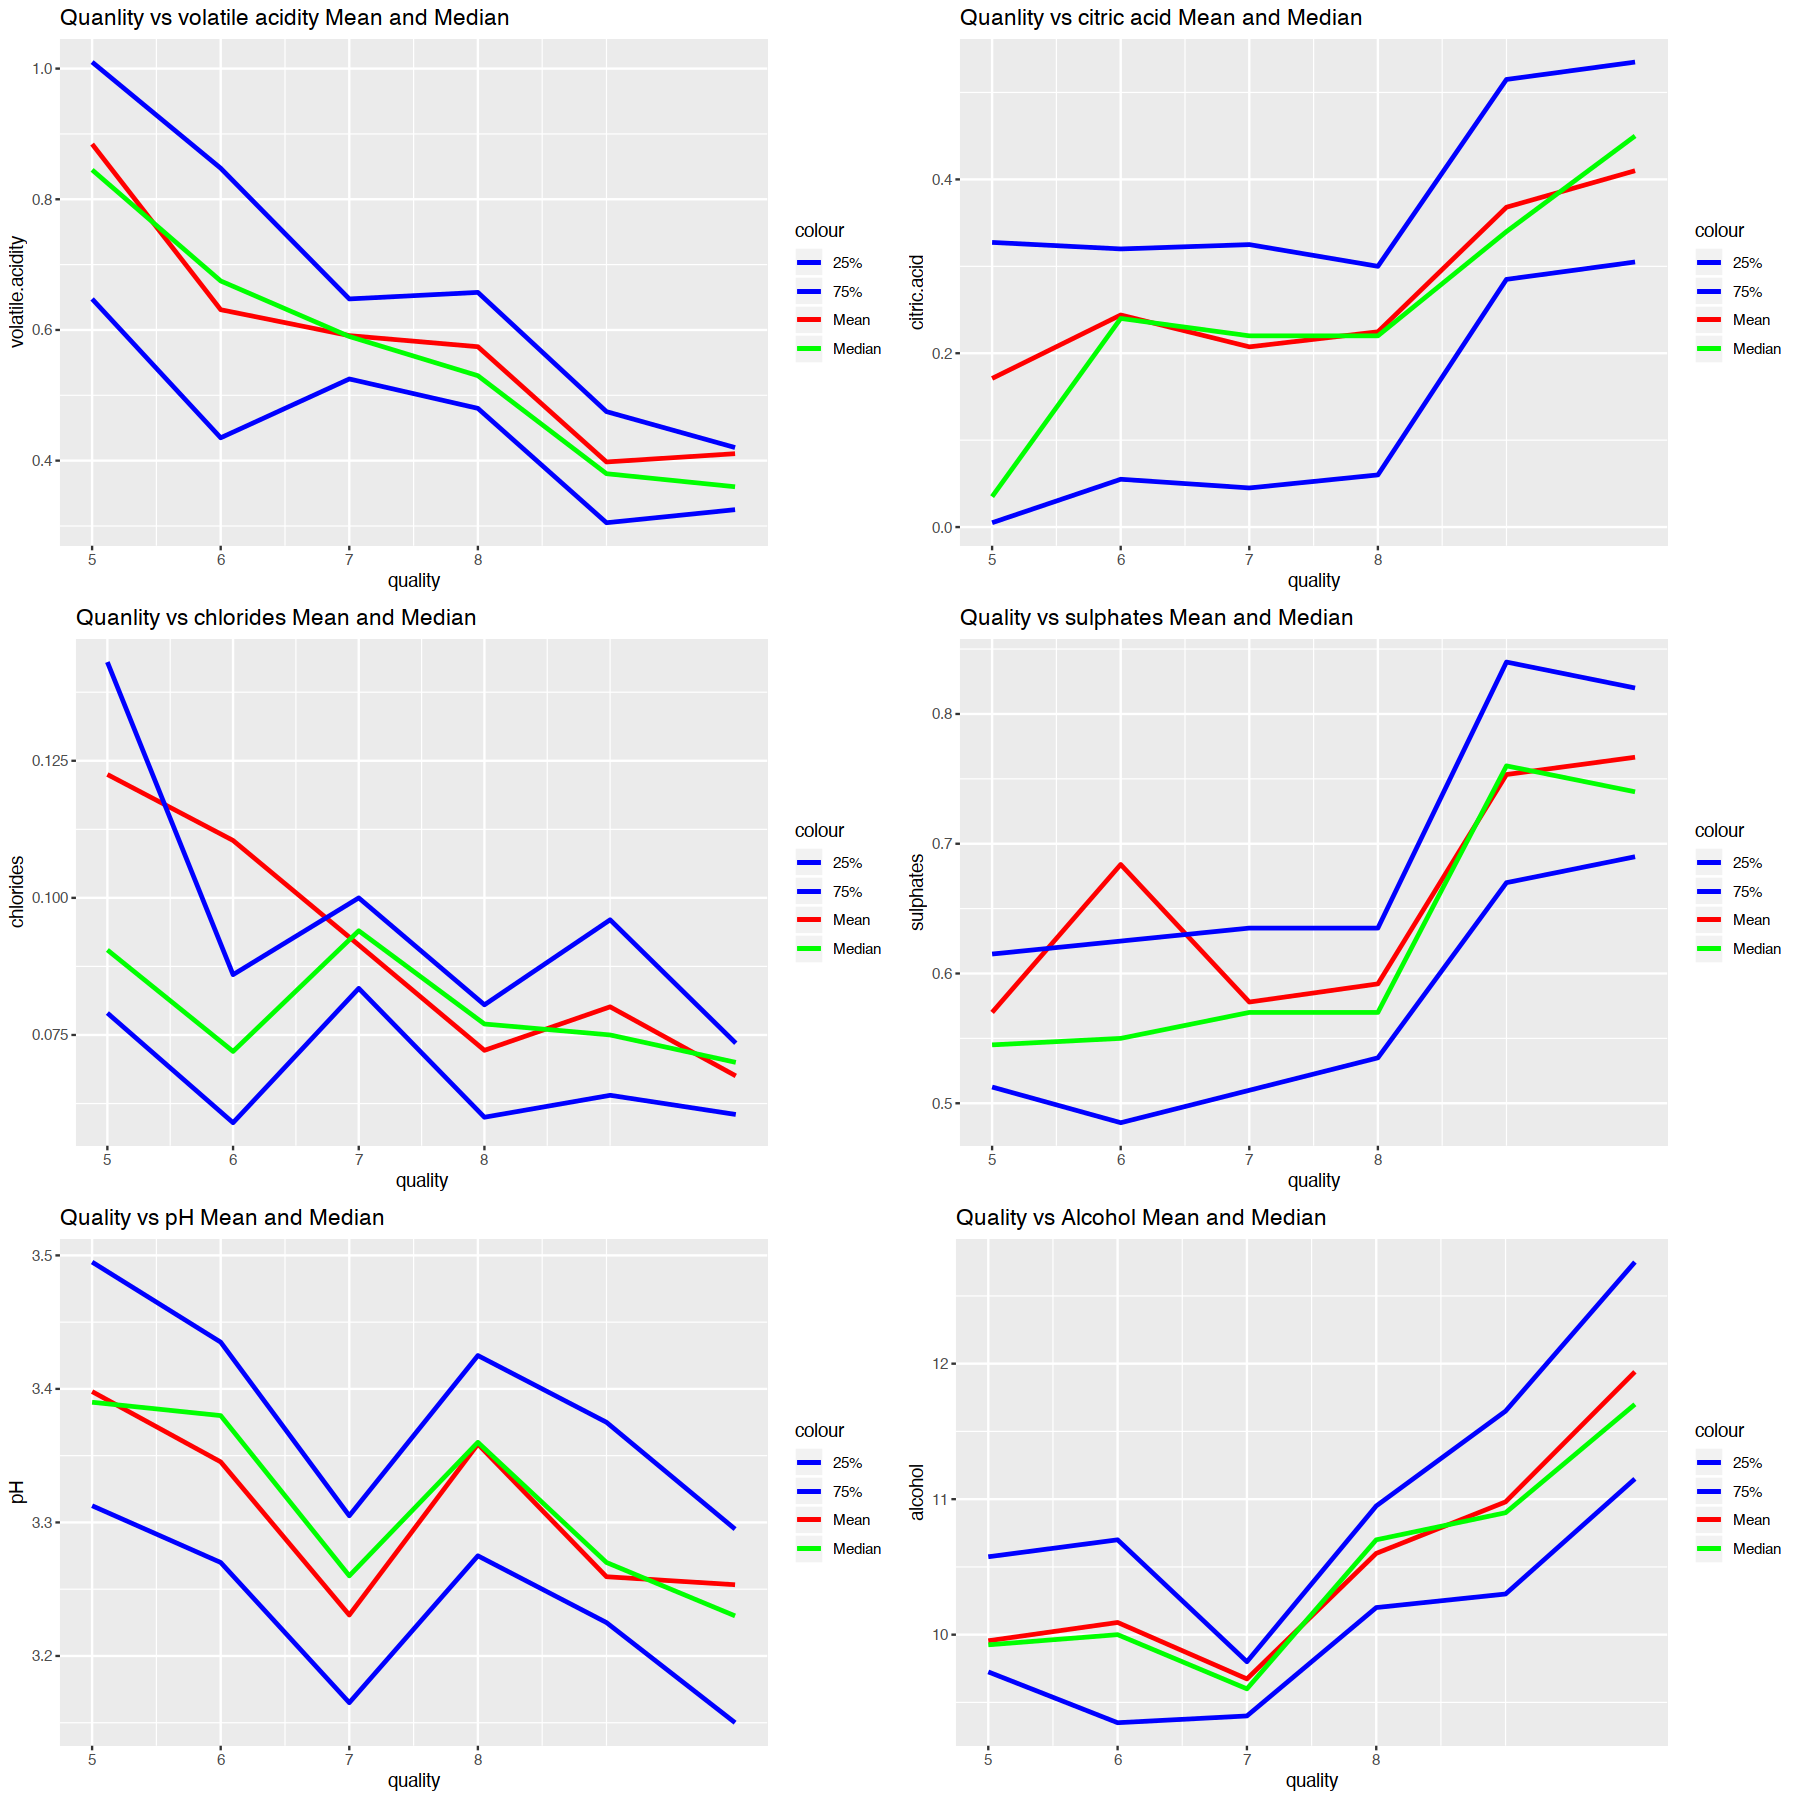

In [11]:
options(repr.plot.width=15, repr.plot.height=15)
p1 = ggplot(aes(y=volatile.acidity, x=quality), data=data)+
  geom_line(stat='summary', fun.y=mean, size=1, aes(color='Mean'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="blue")) +
  ggtitle("Quanlity vs volatile acidity Mean and Median")
p2 = ggplot(aes(y=citric.acid, x=quality), data=data)+
  geom_line(stat='summary', fun.y=mean, size=1, aes(color='Mean'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="blue")) +
  ggtitle("Quanlity vs citric acid Mean and Median")
p3 = ggplot(aes(y=chlorides, x=quality), data=data)+
  geom_line(stat='summary', fun.y=mean, size=1, aes(color='Mean'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="blue")) +
  ggtitle("Quanlity vs chlorides Mean and Median")
p4 = ggplot(aes(y=total.sulfur.dioxide, x=quality), data=data)+
  geom_line(stat='summary', fun.y=mean, size=1, aes(color='Mean'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="blue")) +
  ggtitle("Quality vs total sulfur dioxide Mean and Median")
p5 = ggplot(aes(y=sulphates, x=quality), data=data)+
  geom_line(stat='summary', fun.y=mean, size=1, aes(color='Mean'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="blue")) +
  ggtitle("Quality vs sulphates Mean and Median")
p6 = ggplot(aes(y=pH, x=quality), data=data)+
  geom_line(stat='summary', fun.y=mean, size=1, aes(color='Mean'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="blue")) +
  ggtitle("Quality vs pH Mean and Median")
p7 = ggplot(aes(y=alcohol, x=quality), data=data)+
  geom_line(stat='summary', fun.y=mean, size=1, aes(color='Mean'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="blue")) +
  ggtitle("Quality vs Alcohol Mean and Median")
p8 = ggplot(aes(y=density, x=quality), data=data)+
  geom_line(stat='summary', fun.y=mean, size=1, aes(color='Mean'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.5),
            size=1, aes(color='Median'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.25),
            size=1, aes(color='25%'))+
  geom_line(stat='summary', fun.y=quantile, fun.args=list(probs=0.75),
            size=1, aes(color='75%'))+
  scale_x_continuous(breaks = 1:6, label = 3:8)+
  scale_colour_manual(values = c("Mean"="red", "Median"="green", 
                                 "25%"="blue", "75%"="blue")) +
  ggtitle("Density vs Quality")
#grid.arrange(p4,p1,p2,p3,p5,p6,p7,p8,ncol=2)
grid.arrange(p1,p2,p3,p5,p6,p7,ncol=2)

Observing the plots above, some variables seem to have an almost linear relation to the quality. It seems that the higher the citric acid, sulphates and alchool the higher the quality of the wine (on average), whereas the higher the volatile acidity, chlorides and pH the higher the lower the quality of the wine (on average).

Contingency tables for pairs were not done since our data only has 1 categorial variable, that is actually a numerical variable, since it is a ranking.

# Multivariate Analysis

Since every variable in our dataset is quantitative, we are going to do the multivariate analysis using PCA in order to extract information from the dataset. FactoMineR's PCA standardizes the data automatically, so it will not be done before running the method.

In [12]:
library("FactoMineR")
library("factoextra")

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [17]:
res.pca <- PCA(data[-c(12)], graph = FALSE)
print(res.pca)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 85 individuals, described by 11 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

In [18]:
eig.val <- get_eigenvalue(res.pca)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,3.58625618,32.6023289,32.60233
Dim.2,2.06863728,18.8057935,51.40812
Dim.3,1.60019606,14.5472369,65.95536
Dim.4,1.25171274,11.3792067,77.33457
Dim.5,0.89516934,8.1379031,85.47247
Dim.6,0.46657305,4.2415732,89.71404
Dim.7,0.40912731,3.7193391,93.43338
Dim.8,0.30908570,2.8098700,96.24325
Dim.9,0.24766354,2.2514867,98.49474
Dim.10,0.10126033,0.9205484,99.41529


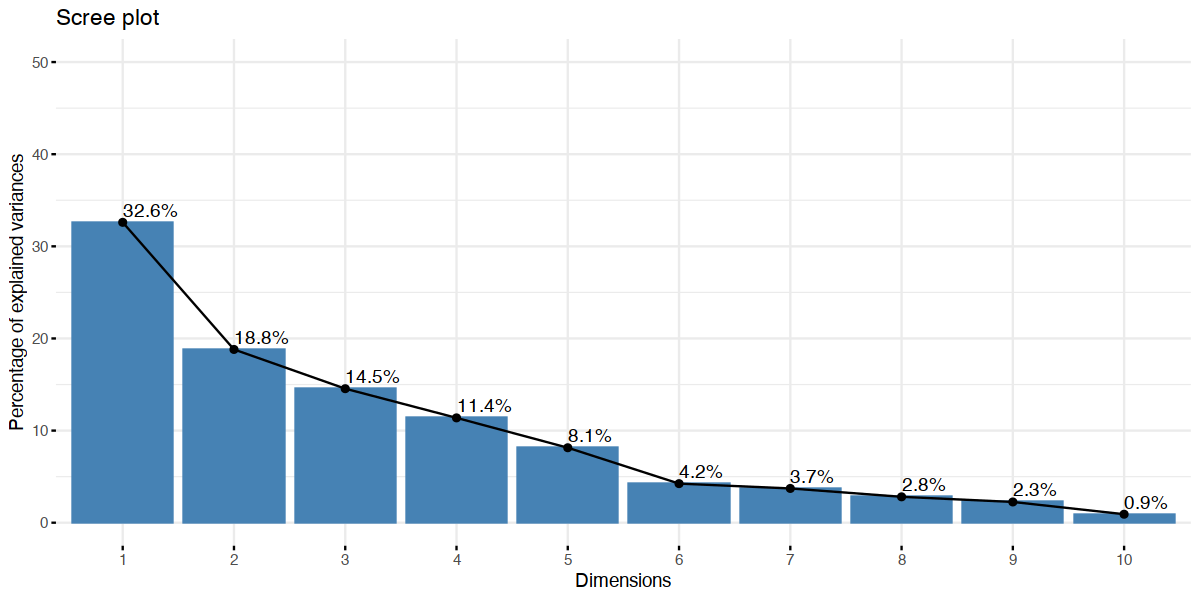

In [20]:
options(repr.plot.width=10, repr.plot.height=5)
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 50))

The eigenvalues measure the amount of variation retained by each principal component, in this case the first 5 dimensions explain 85% of the variation in the data. Taking into account the eigenvalues percentage and the scree plot, we are going to keep the first 5 dimensions.

In [21]:
var <- get_pca_var(res.pca)
var

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

### Correlations

In [38]:
var$cor

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
fixed.acidity,0.836284759,-0.2062874304,-0.09011707,-0.298497821,0.10903021
volatile.acidity,-0.546835407,-0.1775769784,-0.49929143,0.456652507,0.11381151
citric.acid,0.868869952,0.0003285266,0.28804761,-0.092496575,-0.04304984
residual.sugar,0.233558858,-0.4832168104,0.24716711,0.337854763,0.67509487
chlorides,0.499532985,0.2895154792,-0.19850500,0.705725407,-0.16320874
free.sulfur.dioxide,0.005922264,0.8665925793,-0.04969140,-0.081085759,0.31872372
total.sulfur.dioxide,-0.036277912,0.8242737568,-0.14090839,-0.176454690,0.36390961
density,0.704917302,-0.2882189544,-0.50264193,-0.001303602,0.27967102
pH,-0.839660414,-0.0647157369,0.01466365,0.123046552,0.16280195
sulphates,0.522062709,0.3972931360,0.30639252,0.518942573,-0.15759813


The first dimension seems to be related with the acidity of thee wine, since it has high positive correlation with fixed.acidity and citric.acid, and a string negative correlation with pH (which is a metric for acidity). Density also has a big correlation with the first dimension, and while there is some research online that points to a relation between density and pH for some materials, we do not know if it applies to wine.

The second dimension is mainly related to the presence of sulfur dioxide.

The third dimension is mainly related to the alcohol.

The forth dimension is mainly related to the cholrides and sulphates.

The fifth dimension is mainly related to the residual.sugar.

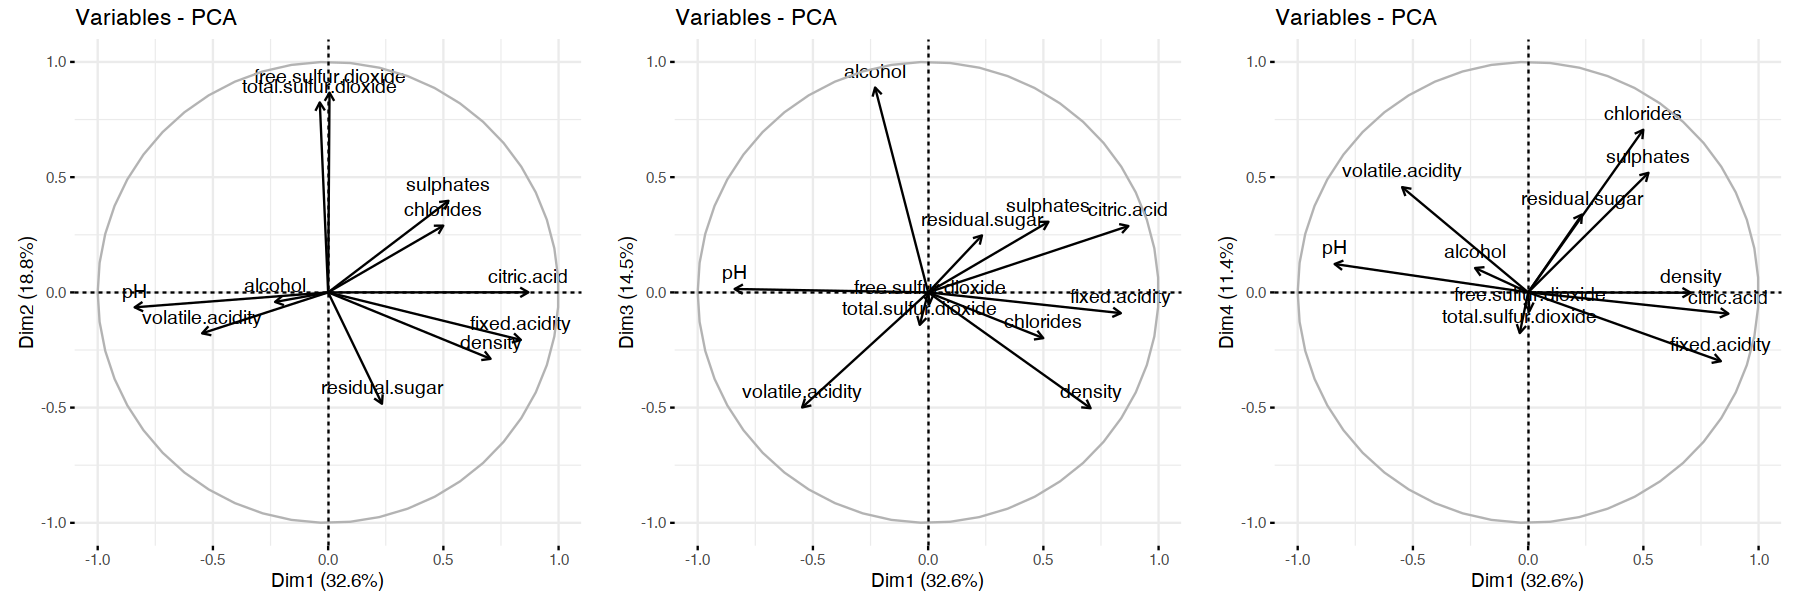

In [30]:
options(repr.plot.width=15, repr.plot.height=5)
p1 = fviz_pca_var(res.pca, col.var = "black")
p2 = fviz_pca_var(res.pca, col.var = "black", axes=c(1,3))
p3 = fviz_pca_var(res.pca, col.var = "black", axes=c(1,4))
grid.arrange(p1,p2,p3,ncol=3)

The variable correlation plots above show the relationships between all variables. The first 4 dimensions are plotted against dimension 1. The distance between variables and the origin measures the quality of the variables on the factor map. 

Positively correlated variables are grouped together.

Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).

As stated before, the "real world" interpretation of the dimensions is not very simple without a chemistry background, but the interpretation is somewhat equivalent to the previous one from the correlation table. On the right side we tend to have variables that relate to acidity and on the left variables that do not explicitly mean acidity or basicity. 

On the second dimension we have on top the wines with high amounts of sulfur. On the third the wines with more alcohol, and on the forth the ones with more chlorides and sulphates.

### Quality of representation

cos2 (square cosine) allows us to access the factor map of the quality of representation.

In [43]:
round_df <- function(x, digits) {
    numeric_columns <- sapply(x, mode) == 'numeric'
    x[numeric_columns] <-  round(x[numeric_columns], digits)
    x
}

round_df(var$cos2, 3)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
fixed.acidity,0.699,0.043,0.008,0.089,0.012
volatile.acidity,0.299,0.032,0.249,0.209,0.013
citric.acid,0.755,0.000,0.083,0.009,0.002
residual.sugar,0.055,0.233,0.061,0.114,0.456
chlorides,0.250,0.084,0.039,0.498,0.027
free.sulfur.dioxide,0.000,0.751,0.002,0.007,0.102
total.sulfur.dioxide,0.001,0.679,0.020,0.031,0.132
density,0.497,0.083,0.253,0.000,0.078
pH,0.705,0.004,0.000,0.015,0.027
sulphates,0.273,0.158,0.094,0.269,0.025


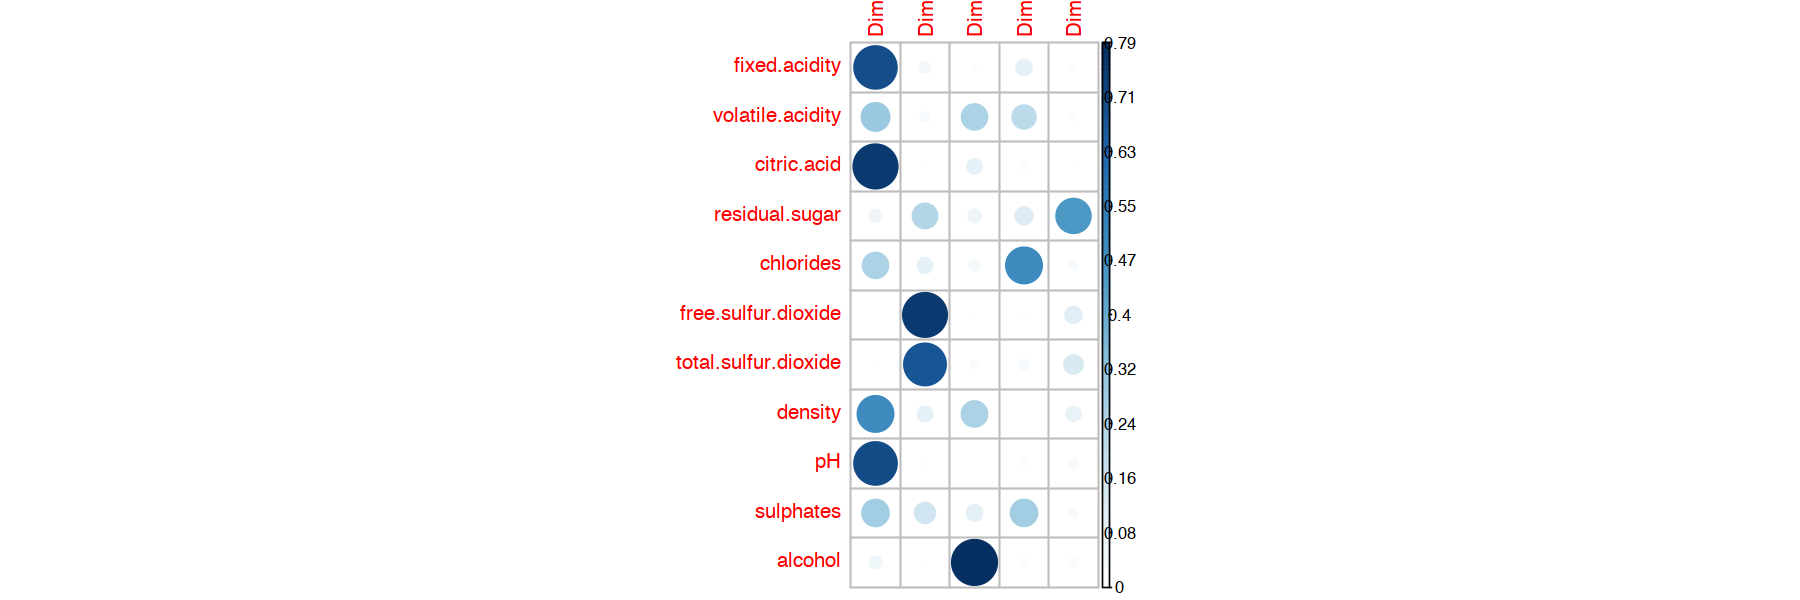

In [36]:
library("corrplot")
corrplot(var$cos2, is.corr=FALSE)

For any variables the sum of the cos2 on all PCs is 1. If the sum of cos2 for two components of a variable equals 1, it will be placed in the circle of correlations, else it will be inside.

The visualization of the cos2 is coherent with the observations done for the correlations table.

Analysing the corrplot we conclude that variables such as fixed.acidity and alcohol are explained almost entirely by one dimension, whereas variables like volatile.acidity and sulphates require 2 to 3 dimensions to be explained.

### Contributions of variables to PCs

The contributions of the variables in accounting for the variability of a given PC are presented below, in percentage.

The variables with higher correlations to PC1 and PC2 will the ones that contribute the most to explain the variability in the dataset.

In [45]:
round_df(var$contrib, 3)

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
fixed.acidity,19.501,2.057,0.508,7.118,1.328
volatile.acidity,8.338,1.524,15.579,16.660,1.447
citric.acid,21.051,0.000,5.185,0.684,0.207
residual.sugar,1.521,11.288,3.818,9.119,50.912
chlorides,6.958,4.052,2.462,39.789,2.976
free.sulfur.dioxide,0.001,36.303,0.154,0.525,11.348
total.sulfur.dioxide,0.037,32.844,1.241,2.487,14.794
density,13.856,4.016,15.789,0.000,8.738
pH,19.659,0.202,0.013,1.210,2.961
sulphates,7.600,7.630,5.867,21.515,2.775


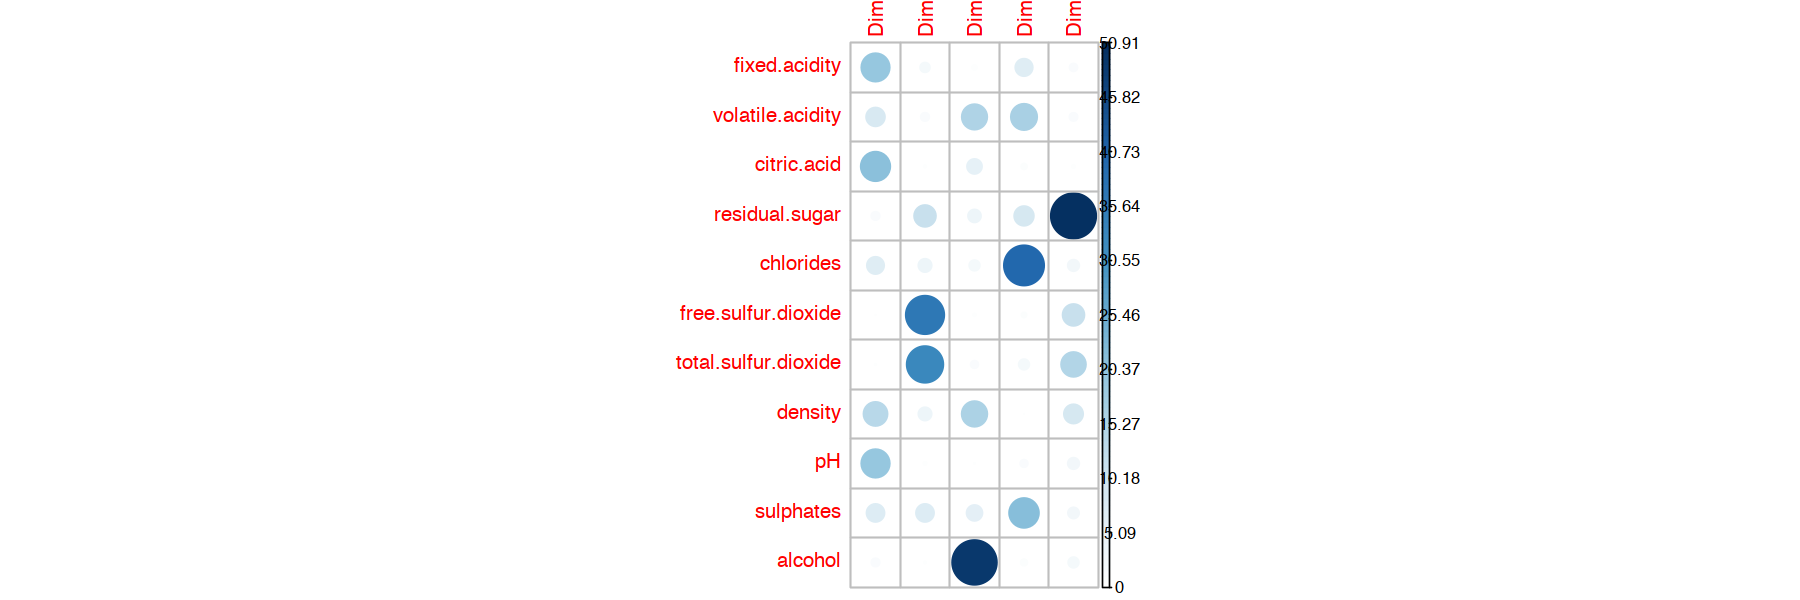

In [47]:
corrplot(var$contrib, is.corr=FALSE)

Looking at the correlations, we can observe that PC1 is explained roughly by 4 varibles, while PC3 and PC5 are almost entirely explained by a single variable.

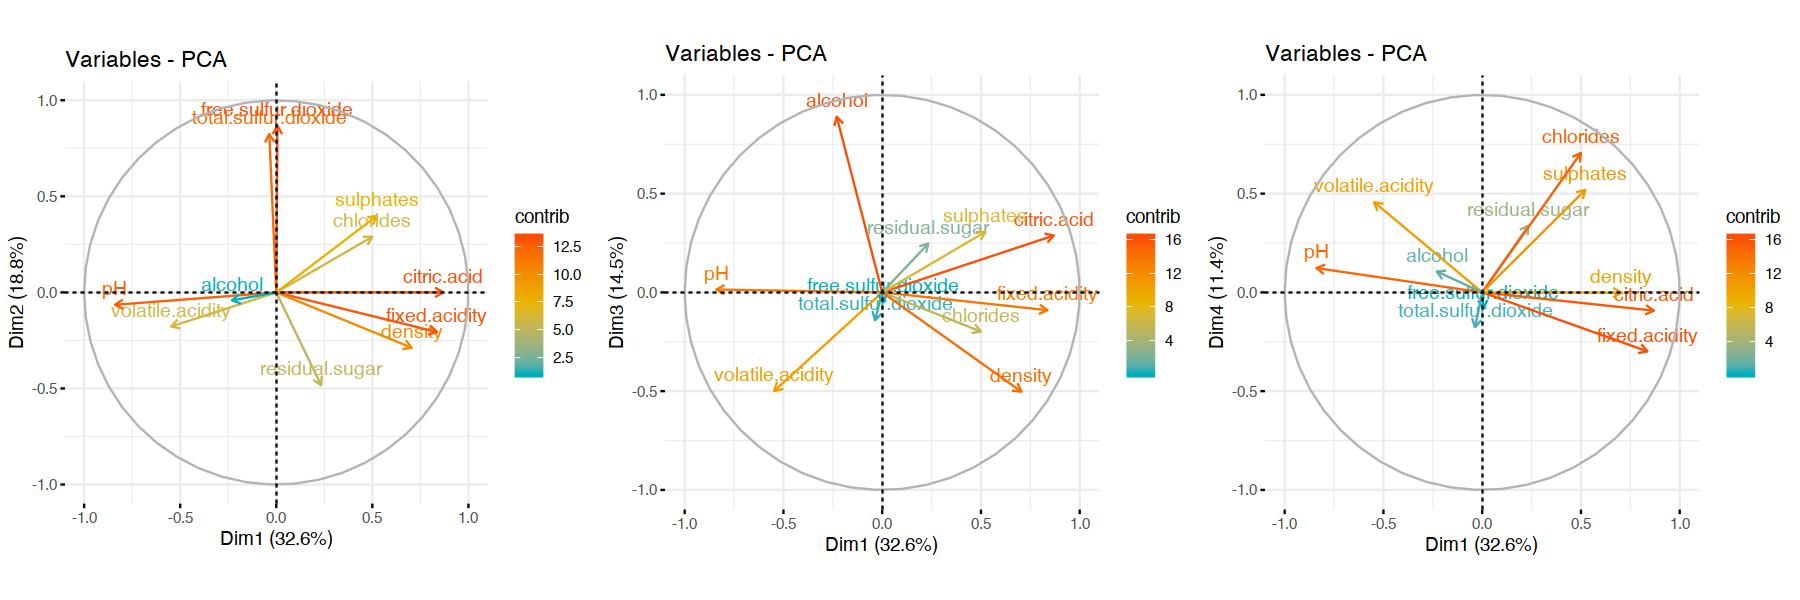

In [50]:
options(repr.plot.width=15, repr.plot.height=5)
p1 = fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
             )
p2 = fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), axes=c(1,3))
p3 = fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), axes=c(1,4))
grid.arrange(p1,p2,p3,ncol=3)

### Graph of individuals

In [53]:
get_pca_ind(res.pca)

Principal Component Analysis Results for individuals
  Name       Description                       
1 "$coord"   "Coordinates for the individuals" 
2 "$cos2"    "Cos2 for the individuals"        
3 "$contrib" "contributions of the individuals"

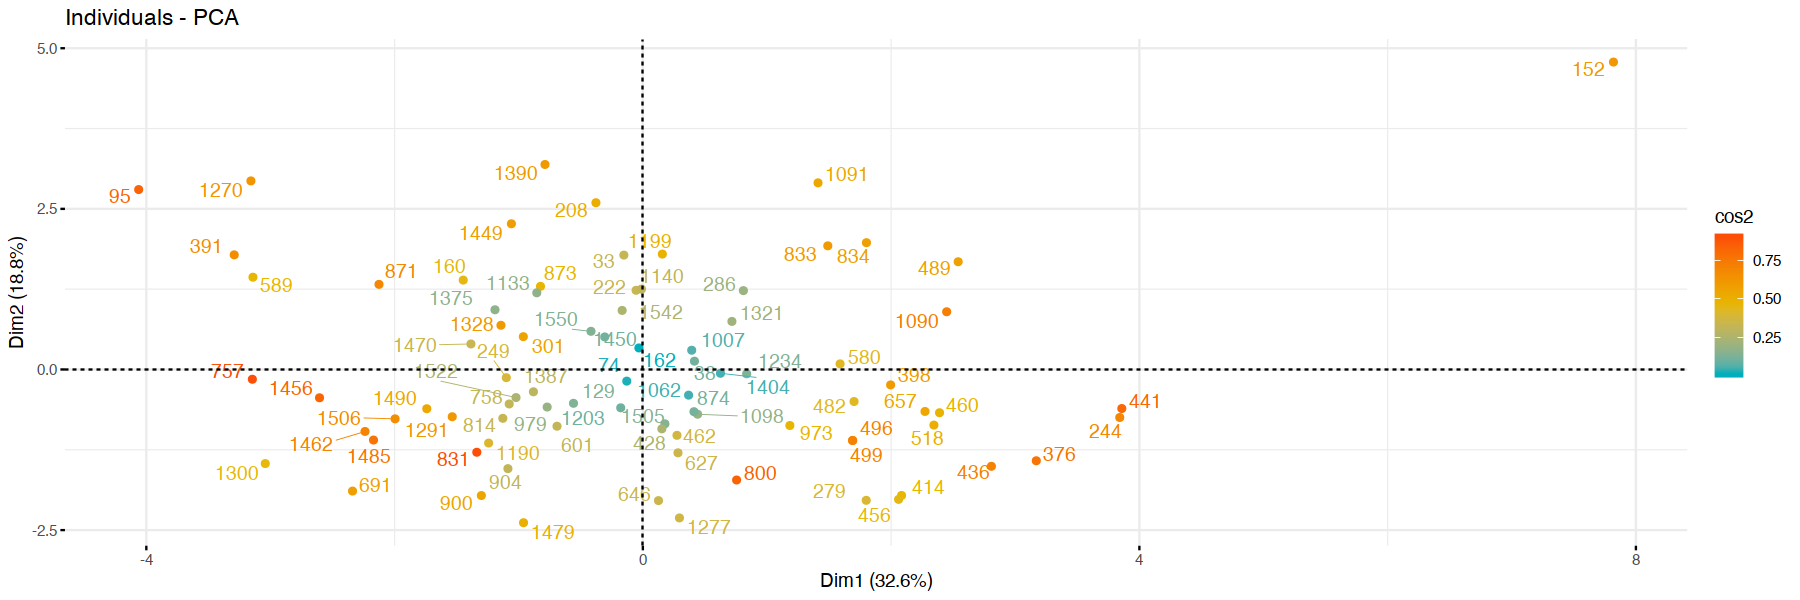

In [54]:
fviz_pca_ind(res.pca, col.ind = "cos2", 
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
             )

Looking at the individual plot we can observe, as expected, that the individuals with higher contributions are more far away from the center, wheres the ones with lowest are closer. However, it is difficult to infer from this plot much about the qualities.

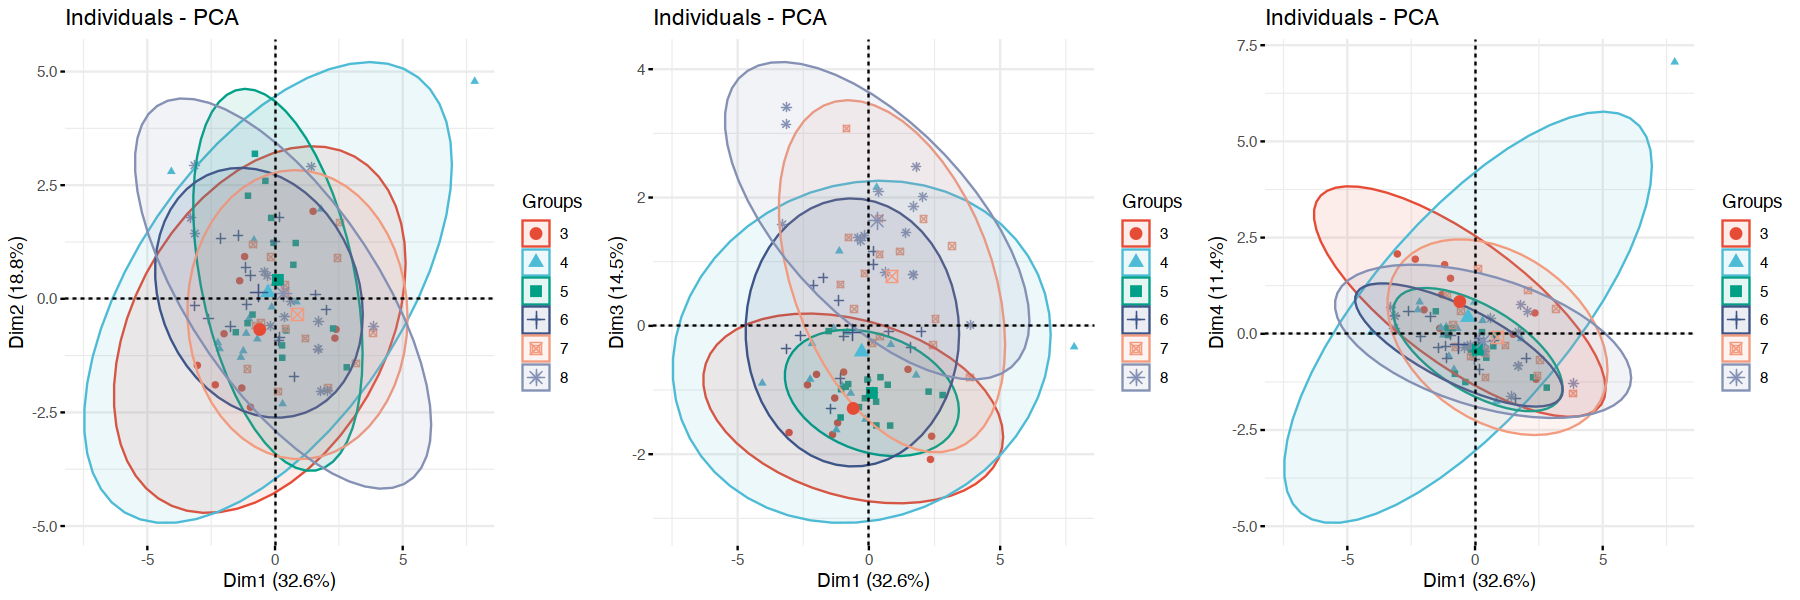

In [66]:
options(repr.plot.width=15, repr.plot.height=5)
p1 = fviz_pca_ind(res.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = as.factor(data$quality), # color by groups
             palette = "npg",
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups",
             axes=c(1,2)
             )
p2 = fviz_pca_ind(res.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = as.factor(data$quality), # color by groups
             palette = "npg",
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups",
             axes=c(1,3)
             )
p3 = fviz_pca_ind(res.pca,
             geom.ind = "point", # show points only (nbut not "text")
             col.ind = as.factor(data$quality), # color by groups
             palette = "npg",
             addEllipses = TRUE, # Concentration ellipses
             legend.title = "Groups",
             axes=c(1,4)
             )
grid.arrange(p1,p2,p3,ncol=3)

Now, plotting the individuals with their respective groups can provide much more insight.

Looking at the PC1 vs PC2 plot we can observe that the higher quality wines tend to be in the II and IV quadrants, while the wines with the lowest qualities tend to be in the I and II quadrants. The wines with medium quality are more distributed through the 4 quadrants.

Plotting PC1 against PC3, it is possible to observe that the higher quality wines will tend to be in the I and II quadrants, which meant having higher alcohol levels.

On the plot against PC4 there are less evident conclusions. The main difference that can be observed is that the lower quality wines seem to have higher spreads around the plot.